# Imports

In [128]:
import sys
import importlib
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.stats import zscore as zscore
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation
sys.path.append('C:\\Users\\jlt6316\\Experiments\\PintoLab_behavioralAnalysis\\python')
import queryBehavior as qb

npr.seed(0)

# Create DJ virtual module

In [30]:
sys.path.append('C:\\Users\\jlt6316\\Experiments\\PintoLab_behavioralAnalysis\\python\\lib')
import InitialConf
VM = InitialConf.getVirtualModules()

DataJoint version:
0.14.1
DataJoint connection (connected) ward5243user@vfsmphysiomdb01.fsm.northwestern.edu:3306
List of virtual modules:
['subject', 'behavior', 'session', 'procedure', 'widefield_redux', 'lab', 'eyetracking', 'opto']
Set up external storage at \\fsmresfiles.fsm.northwestern.edu\fsmresfiles\Basic_Sciences\Phys\PintoLab\_Dj_external


# Get one example session of towers data

In [46]:
performance = pd.DataFrame((VM['behavior'].Performance & 'subject_fullname = "jlt6316_DrChuck"' & 'task = "TowersTaskSwitchEasy"').fetch())
performance

,subject_fullname,session_date,session_number,task,protocol_id,main_maze_id,warmup_maze_id,all_maze_id,do_advance,proportion_correct,...,stim_bias,frac_good_trials_motor,frac_completed_trials,mean_excess_travel,num_trials,trials_per_min,total_reward_earned,reward_gain,total_num_trials,total_num_iter
0,jlt6316_DrChuck,2023-03-03,1,TowersTaskSwitchEasy,6,"[[1.0], [2.0]]",None,"[[1.0], [2.0]]",0,"[[0.9], [0.6632653061224489]]",...,"[[nan], [nan]]","[[0.8], [0.8571428571428571]]","[[1.0], [1.0]]","[[-0.01246562483642708], [-0.008903468294729083]]","[[10.0], [196.0]]","[[6.955740599380339], [4.144841839538699]]",0.7784,1.4,206,458533
1,jlt6316_DrChuck,2023-03-06,1,TowersTaskSwitchEasy,6,"[[2.0], [3.0], [4.0]]",None,"[[2.0], [3.0], [4.0]]",1,"[[0.7209302325581395], [0.9125], [0.9354838709...",...,"[[nan], [nan], [nan]]","[[0.9534883720930233], [0.95], [0.936170212765...","[[1.0], [1.0], [0.9893617021276596]]","[[-0.09893946118646753], [-0.06956452131936787...","[[43.0], [80.0], [94.0]]","[[6.580313743319672], [4.039520501042828], [2....",1.0696,1.4,217,545299
2,jlt6316_DrChuck,2023-03-08,1,TowersTaskSwitchEasy,6,[[4.0]],None,[[4.0]],1,[[0.973384030418251]],...,[[nan]],[[0.9239543726235742]],[[1.0]],[[-0.11845349171197504]],[[263.0]],[[4.189797643904913]],1.4336,1.4,263,511262
3,jlt6316_DrChuck,2023-03-09,1,TowersTaskSwitchEasy,6,[[5.0]],[[4.0]],"[[4.0], [5.0]]",0,"[[0.9902912621359223], [0.6129032258064516]]",...,"[[nan], [nan]]","[[0.9514563106796117], [0.967741935483871]]","[[1.0], [1.0]]","[[-0.14393271391483023], [-0.11182333844102299]]","[[103.0], [124.0]]","[[4.8902333533064954], [4.30336578513637]]",0.9968,1.4,227,452663
4,jlt6316_DrChuck,2023-03-10,1,TowersTaskSwitchEasy,6,[[5.0]],[[4.0]],"[[4.0], [5.0]]",0,"[[0.9791666666666666], [0.6370370370370371]]",...,"[[nan], [nan]]","[[1.0], [0.9111111111111111]]","[[1.0], [1.0]]","[[-0.1767864882807585], [-0.01586610477565971]]","[[96.0], [135.0]]","[[5.046866475637981], [3.4902291447456943]]",1.0080,1.4,231,511498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,jlt6316_DrChuck,2023-05-30,1,TowersTaskSwitchEasy,9,[[11.0]],[[13.0]],"[[13.0], [11.0], [12.0]]",0,"[[1.0], [0.7899543378995434], [0.9928057553956...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.16734032996480977], [-0.17223346701072345...","[[10.0], [219.0], [139.0]]","[[7.279550408560763], [7.707642093630468], [8....",1.9260,1.5,368,454393
69,jlt6316_DrChuck,2023-05-31,1,TowersTaskSwitchEasy,9,[[11.0]],[[13.0]],"[[13.0], [11.0], [12.0]]",0,"[[1.0], [0.7330097087378641], [0.9313725490196...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.1727603423128557], [-0.1720335248920784],...","[[10.0], [206.0], [102.0]]","[[8.047294583320012], [7.933620556804368], [7....",1.5360,1.5,318,412494
70,jlt6316_DrChuck,2023-06-02,1,TowersTaskSwitchEasy,9,[[11.0]],[[13.0]],"[[13.0], [11.0], [12.0]]",0,"[[0.8], [0.7980769230769231], [0.9586776859504...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.1697331859878211], [-0.17265833822858936]...","[[20.0], [208.0], [121.0]]","[[7.539401629157127], [7.777535029013324], [7....",1.7880,1.5,349,442670
71,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,[[11.0]],[[13.0]],"[[13.0], [11.0], [12.0]]",0,"[[1.0], [0.774468085106383], [0.98496240601503...",...,"[[nan], [nan], [nan]]","[[1.0], [1.0], [1.0]]","[[1.0], [1.0], [1.0]]","[[-0.16974217405594252], [-0.17004518330646923...","[[10.0], [235.0], [133.0]]","[[8.104747124237495], [8.45081890678869], [8.6...",1.9380,1.5,378,447250


In [142]:
# Data restrictions
mouse_filter     = qb.genFilter('subject_fullname', 'jlt6316_DrChuck')
date_filter      = qb.genFilter('session_date', '2023-06-05')
task_filter      = qb.genFilter('task', 'TowersTaskSwitchEasy')
main_maze_filter = qb.genFilter('main_maze_id', 11)
maze_fitler      = qb.genFilter('maze_id', [11])  
out_vars         = [
  'maze_id',
  'trial_type',
  'choice',
  'num_towers_left',
  'num_towers_right',
  'num_towers_delta',
  'trial_duration',
  'excess_travel',
  'mean_speed_stem',
  'block_performance',
  'is_first_trial_of_block']

# Fetch data
data = pd.DataFrame((VM['behavior'].TowersSessionTrial & mouse_filter & date_filter & task_filter & main_maze_filter & maze_fitler).proj(*out_vars).fetch())
data = qb.rm_abort_session(data) 
data = data.drop(data[data['choice'] == 'nil'].index)
data = data.reset_index(drop = True)
data

[2023-06-23 18:22:15,174][WARNING]: MySQL server has gone away. Reconnecting to the server.


,subject_fullname,session_date,session_number,task,protocol_id,trial_id,maze_id,trial_type,choice,num_towers_right,num_towers_left,num_towers_delta,trial_duration,excess_travel,mean_speed_stem,block_performance,is_first_trial_of_block
0,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,11,11,R,R,7,3,4,7.10880,-0.170830,67.4194,0.882353,1
1,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,12,11,R,L,3,1,2,6.51719,-0.175475,65.0734,0.882353,0
2,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,13,11,R,R,2,0,2,7.32121,-0.168038,62.4814,0.882353,0
3,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,14,11,R,L,4,2,2,6.36714,-0.175761,66.7050,0.882353,0
4,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,15,11,R,R,8,1,7,6.97571,-0.171313,63.8810,0.882353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,373,11,R,R,7,1,6,17.63900,-0.166703,23.9623,0.833333,1
230,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,374,11,L,R,2,4,-2,6.42672,-0.169305,69.6166,0.833333,0
231,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,375,11,L,L,3,4,-1,7.29244,-0.166595,68.6704,0.833333,0
232,jlt6316_DrChuck,2023-06-05,1,TowersTaskSwitchEasy,9,376,11,R,R,5,1,4,6.87821,-0.164677,70.5002,0.833333,0


# Initialize GLM-HMM

In [211]:
# Set the parameters of the GLM-HMM
num_states     = 1    # number of discrete states
obs_dim        = 1    # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim      = 2    # input dimensions

# Make a GLM-HMM
glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

# Organise inputs

In [219]:
num_sess          = 1
input             = np.ones((num_sess, len(data), input_dim))
input[0, :, 1]    = data['num_towers_delta'].to_numpy(dtype=float)
# input[0, :, 0]    = zscore(data['num_towers_delta'].to_numpy(dtype=float), nan_policy='omit')
input             = list(input) 
chose_right       = np.zeros((len(data), 1))
chose_right[:, 0] = np.array((data['choice'] == 'R'))
chose_right       = chose_right.astype(int)
chose_right       = [chose_right]

In [220]:
input

[array([[  1.,   4.],
        [  1.,   2.],
        [  1.,   2.],
        [  1.,   2.],
        [  1.,   7.],
        [  1.,  -4.],
        [  1.,   1.],
        [  1.,  -2.],
        [  1.,   2.],
        [  1.,  -2.],
        [  1.,   1.],
        [  1.,  -2.],
        [  1.,  -1.],
        [  1.,   2.],
        [  1.,   1.],
        [  1.,   3.],
        [  1.,  -2.],
        [  1.,   4.],
        [  1.,  -3.],
        [  1.,   4.],
        [  1.,  -1.],
        [  1.,   4.],
        [  1.,   7.],
        [  1.,   1.],
        [  1.,  -2.],
        [  1.,   1.],
        [  1.,  -5.],
        [  1.,   7.],
        [  1.,   4.],
        [  1.,  -3.],
        [  1.,  -2.],
        [  1.,   6.],
        [  1.,   5.],
        [  1.,  -9.],
        [  1.,   3.],
        [  1.,  -6.],
        [  1.,   1.],
        [  1.,  -4.],
        [  1.,   4.],
        [  1.,   7.],
        [  1.,  -2.],
        [  1.,   2.],
        [  1.,   4.],
        [  1.,   5.],
        [  1.,  -5.],
        [ 

In [221]:
chose_right

[array([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],

# Fit GLM-HMM

In [229]:
N_iters = 200 # maximum number of EM iterations. Fitting with stop earlier if increase in LL is below tolerance specified by tolerance parameter
fit_ll = glmhmm.fit(chose_right, inputs=input, method="em", num_iters=N_iters, tolerance=10**-4)

  0%|          | 0/200 [00:00<?, ?it/s]

In [230]:
chose_right

[array([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],

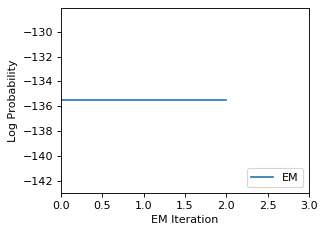

In [231]:
# Plot the log probabilities of the true and fit models. Fit model final LL should be greater 
# than or equal to true LL.
fig = plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fit_ll, label="EM")
plt.legend(loc="lower right")
plt.xlabel("EM Iteration")
plt.xlim(0, len(fit_ll))
plt.ylabel("Log Probability")
plt.show()

In [224]:
glmhmm.most_likely_states(chose_right[0], input=input[0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [232]:
glmhmm.observations.params

array([[[ 0.15854555, -0.35793196]]])